
1. cargar datos para x e y
2. entrenar un modelo de regresion lineal y polinomica con prueba de diferentes grados
3. graficar
4. obtener datos de error cuadratico y Coeficiente de determinación de cada grado


#### Cargamos las librerias necesarias

In [51]:
import numpy as np
import pandas as pd
import random

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [52]:
#### se cargan los datos en X e y

In [53]:
# Carga de datos
X = np.array([258.0,270.0,294.0,320.0,342.0,368.0,396.0,446.0,480.0,586.0,700.0])
y = np.array([236.4,234.4,252.8,298.6,314.2,342.2,360.8,368.0,391.2,390.8,450.0])

### necesario hacer transpose de X con NumPy

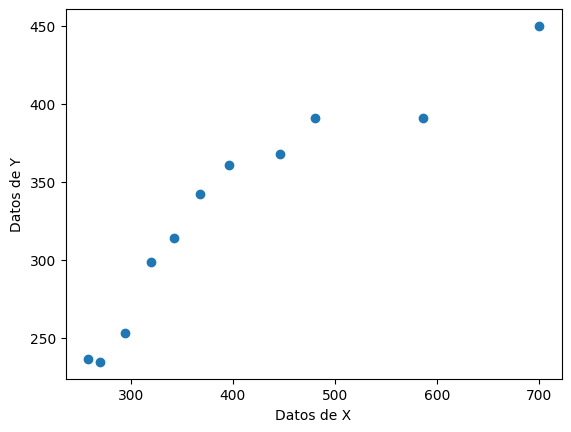

In [54]:
plt.scatter(X,y)
plt.xlabel("Datos de X")
plt.ylabel("Datos de Y")

#necesario hacer transpose de X antes de pasar los datos al modelo para que sea un array en 2D y no sea 1D
X=np.transpose([X])

#### se entrena un modelo de regresion lineal

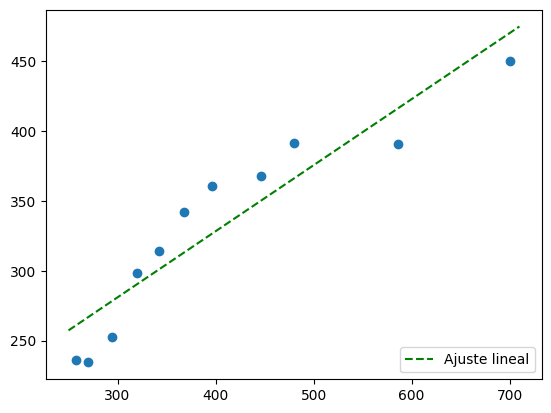

In [55]:

#Este modelo calcula la LINEA de mejor ajuste que minimiza 
# la suma de los cuadrados de los errores entre los valores reales de y y los valores predichos por el modelo.
lr = LinearRegression().fit(X,y)

ajuste_de_X=np.arange(250,720,10)

ajuste_de_X=np.transpose([ajuste_de_X])

y_lin_pred = lr.predict(ajuste_de_X)

plt.scatter(X,y)
plt.plot(ajuste_de_X,y_lin_pred,label="Ajuste lineal",linestyle='--',color='green')
plt.legend(loc='lower right')

#### usamos para la curva PolynomialFeatures a 0 (en realidad sera una recta)

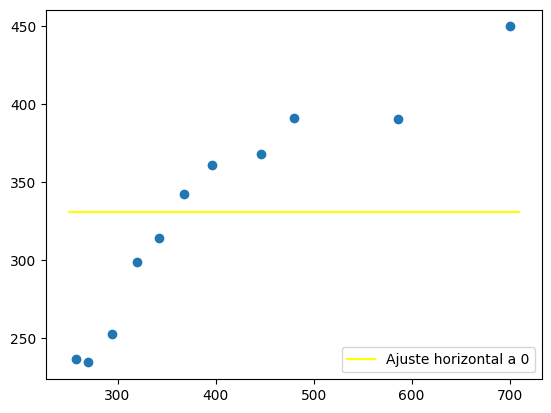

In [56]:
#creamos los ajsutes de la curva con PolynomialFeatures a 0 (en realidad sera una recta)
Horizontal = PolynomialFeatures(degree=0) #Cuando el grado es 0, PolynomialFeatures ignora los valores de X y crea una nueva matriz donde cada elemento es simplemente un 1.

X_horizontal = Horizontal.fit_transform(X)

pr0 =LinearRegression().fit(X_horizontal, y)

y_horizontal_ajuste=pr0.predict(Horizontal.fit_transform(ajuste_de_X))

plt.scatter(X,y)

plt.plot(ajuste_de_X,y_horizontal_ajuste,label="Ajuste horizontal a 0",color='yellow')

plt.legend(loc='lower right')

#### usamos para la curva PolynomialFeatures a 2

el nuevo valor de Y predicho en base a X = 1200 con degree 2 es : 706.49




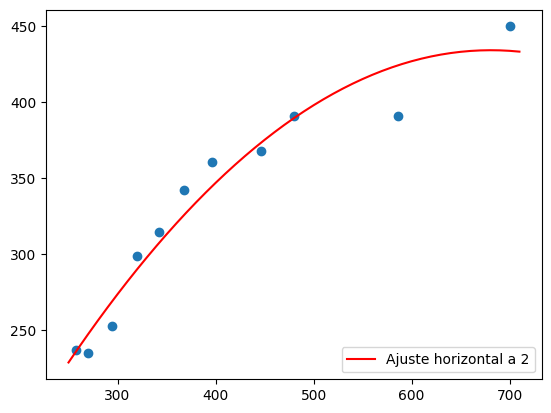

In [57]:
#creamos los ajsutes de la curva con PolynomialFeatures a 2
cuadratico = PolynomialFeatures(degree=2)

X_cuadra = cuadratico.fit_transform(X)

pr2 =LinearRegression().fit(X_cuadra, y)

y_cuadratico_pred=pr2.predict(cuadratico.fit_transform(ajuste_de_X))

plt.scatter(X,y)

plt.plot(ajuste_de_X,y_cuadratico_pred,label="Ajuste horizontal a 2",color='Red')

plt.legend(loc='lower right')

#Valor nuevo a predecir con degree a 2
X_nuevo_valor = ([[1200]])

y_predic = lr.predict(X_nuevo_valor)

print(f"el nuevo valor de Y predicho en base a X = 1200 con degree 2 es : {y_predic[0]:.2f}")
print('\n')

#### usamos para la curva PolynomialFeatures a 4

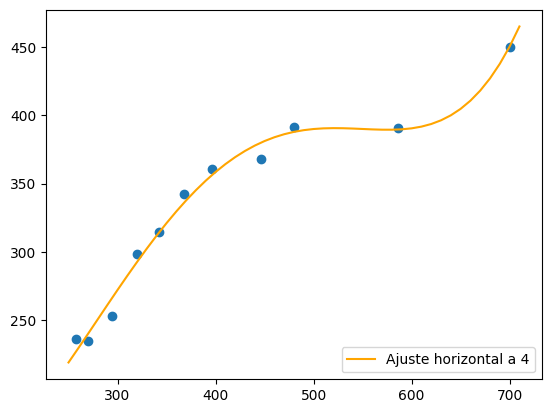

In [58]:
#creamos los ajsutes de la curva con PolynomialFeatures a 4
cuatro = PolynomialFeatures(degree=4)
X_cuatro = cuatro.fit_transform(X)

pr4 =LinearRegression().fit(X_cuatro, y)

y_cuatro_ajuste=pr4.predict(cuatro.fit_transform(ajuste_de_X))

plt.scatter(X,y)

plt.plot(ajuste_de_X,y_cuatro_ajuste, label="Ajuste horizontal a 4",color='Orange')

plt.legend(loc='lower right')

In [59]:
#### usamos para la curva PolynomialFeatures a 9

el nuevo valor de Y predicho en base a X = 1200 con degree 9 es : 706.49


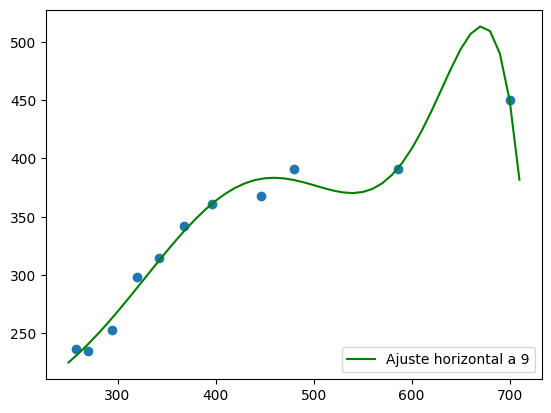

In [60]:
#creamos los ajsutes de la curva con PolynomialFeatures a 9
noveno = PolynomialFeatures(degree=9)
X_noveno = noveno.fit_transform(X)

pr9 =LinearRegression().fit(X_noveno, y)

y_noveno_pred=pr9.predict(noveno.fit_transform(ajuste_de_X))

plt.scatter(X,y)

plt.plot(ajuste_de_X,y_noveno_pred,label="Ajuste horizontal a 9",color='Green')

plt.legend(loc='lower right')

#Valor nuevo a predecir con degree a 9
X_nuevo_valor = ([[1200]])

y_predic = lr.predict(X_nuevo_valor)

print(f"el nuevo valor de Y predicho en base a X = 1200 con degree 9 es : {y_predic[0]:.2f}")

#### Calculo del error cuadratico de cada modelo. (MSE, Mean Squared Error)

#### El error cuadrático medio es una medida que nos indica qué tan lejos están las predicciones de un modelo de regresión de los valores reales.

>Piensa que tienes un modelo que predice algo, por ejemplo, cuántos libros leerá alguien en un mes.

>Si la persona realmente lee 5 libros y tu modelo predice 4, estás 1 libro lejos.

>Si otra persona lee 3 y predices 5, estás 2 libros lejos.

>El error cuadrático básicamente hace esto:

>Calcula la diferencia entre lo que predijo el modelo y lo que pasó realmente.

>Eleva esa diferencia al cuadrado (para que los errores grandes “pesen más”).

>Saca el promedio de todos esos errores.

In [61]:
#Errores cuadráticos medios y coeficientes de determinación
y_hor_ajuste=pr0.predict(X_horizontal)

y_line_pred=lr.predict(X)

y_cuadratico_pred=pr2.predict(X_cuadra)

y_cuatro_pred=pr4.predict(X_cuatro)

y_noveno_pred=pr9.predict(X_noveno)

print("Errores cuadráticos medios")

print("Error cuadrático medio del modelo constante:", round(mean_squared_error(y,y_hor_ajuste),4))

print("Error cuadrático medio del modelo lineal:",round(mean_squared_error(y,y_line_pred),4))

print("Error cuadrático medio del modelo cuadrático:",round(mean_squared_error(y,y_cuadratico_pred),4))

print("Error cuadrático medio del modelo a la cuarta:",round(mean_squared_error(y,y_cuatro_pred),4))

print("Error cuadrático medio del modelo a la novena:", round(mean_squared_error(y,y_noveno_pred),4))

Errores cuadráticos medios
Error cuadrático medio del modelo constante: 4497.3898
Error cuadrático medio del modelo lineal: 598.4031
Error cuadrático medio del modelo cuadrático: 225.9397
Error cuadrático medio del modelo a la cuarta: 48.279
Error cuadrático medio del modelo a la novena: 53.2929


#### Calculo del Coeficiente de Determinacion.
#### El coeficiente de determinación, o 𝑅2, mide qué proporción de la variabilidad de la variable dependiente puede explicarse mediante el modelo de regresión

>qué tan bueno es tu modelo comparado con simplemente adivinar usando el promedio de todos los datos.

>Si el modelo predice mucho mejor que la media, 𝑅2 será cercano a 1.
 >Si el modelo no mejora la media, 𝑅2 será cercano a 0.
 >Si tu modelo es peor que la media, 𝑅2 será negativo.

>Interpretación sencilla:
    >𝑅2 = 0.8 → tu modelo explica el 80% de lo que pasa en los datos.
    >𝑅2=0.3 → tu modelo apenas explica un 30%.

In [62]:
print ("Coeficientes de determinación")

print("Coeficiente de determinación del modelo constante:",round(r2_score(y,y_hor_ajuste),4))

print("Coeficiente de determinación del modelo lineal:",round(r2_score(y,y_line_pred),4))

print("Coeficiente de determinación del modelo cuadrático:",round(r2_score(y, y_cuadratico_pred),4))

print("Coeficiente de determinación del modelo a la cuarta:",round(r2_score(y,y_cuatro_pred),4))

print("Coeficiente de determinación del modelo a la novena:",round(r2_score(y,y_noveno_pred),4))

Coeficientes de determinación
Coeficiente de determinación del modelo constante: 0.0
Coeficiente de determinación del modelo lineal: 0.8669
Coeficiente de determinación del modelo cuadrático: 0.9498
Coeficiente de determinación del modelo a la cuarta: 0.9893
Coeficiente de determinación del modelo a la novena: 0.9882


In [63]:
plt.show()